In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
bankDf = pd.read_csv('bank-full.csv')
bankDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Deliverable 1 - Question 1

In [58]:
bankDf.shape

(45211, 17)

In [59]:
bankDf.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [60]:
for x in bankDf.columns:
    if ('object'==bankDf[x].dtype):
        bankDf[x]=pd.Categorical(bankDf[x])

bankDf.head(10)
        

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [61]:
bankDf.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [62]:
bankDf.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [63]:
bankDf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1.a Above will give us range of the numerical varibles with min, max values and standard deviation

In [64]:
bankDf.nunique() ## Using this we can find unique values for each row and identify how we can handle categorical variables

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

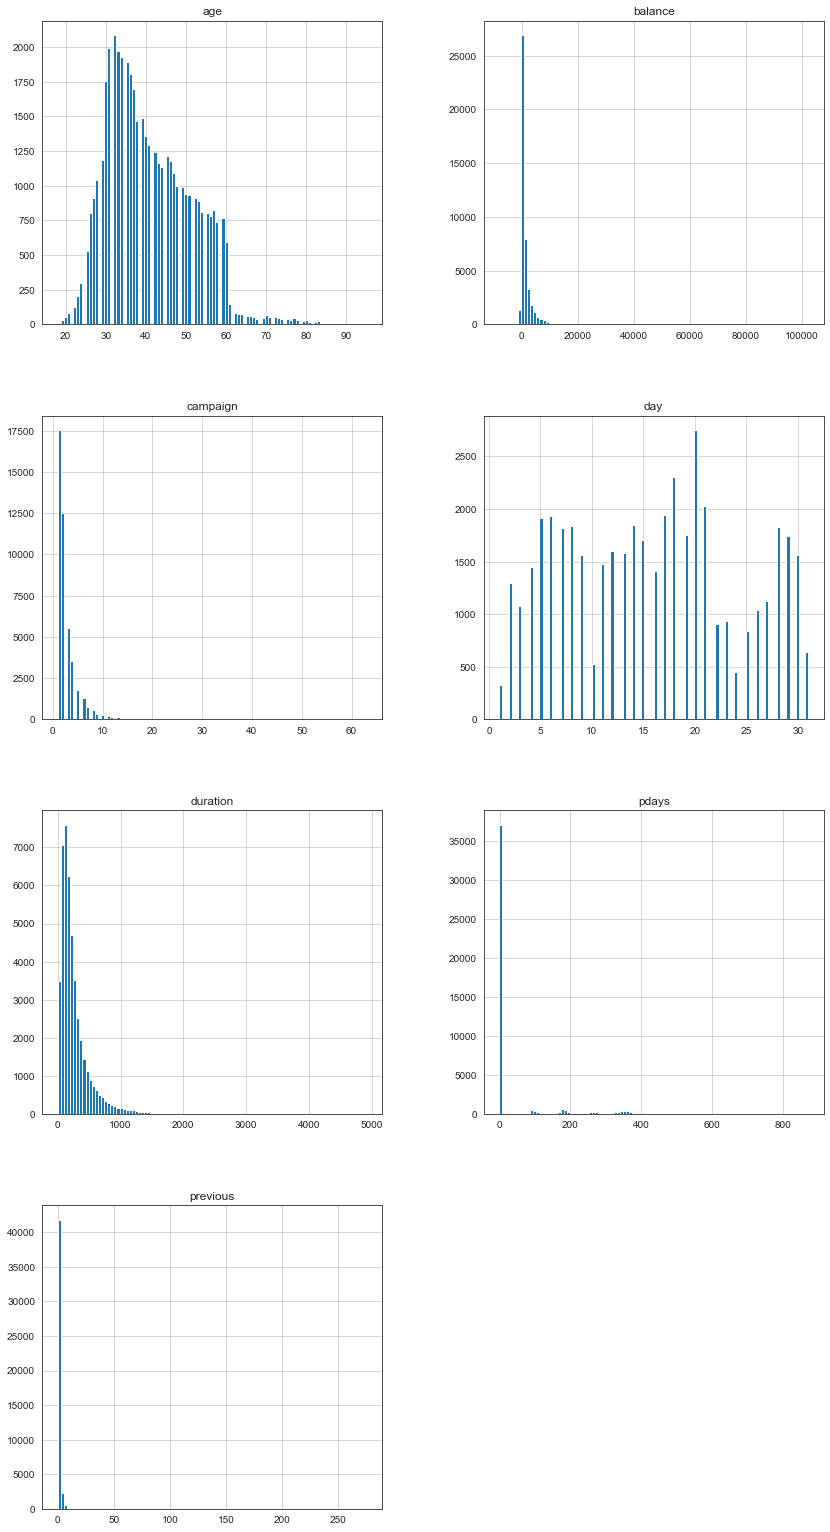

In [65]:
bankDf.hist(stacked=False, bins=100, figsize=(14,100), layout=(14,2)); # performing univariate analysis on numerical variables

### We can get lot of information from above plots
### Age: Although its not a proper bell curve we can see that there is a pattern and we may exclude outliers here if needed for analysis
### Balance: As expected there is skewness in the data for balance. Negative balance can be considered that they might have withdrawn more than what they have. Certain customers have very balance so we can consider them as outliers if needed
### Capaign: Looks like left skewed. Looks like there are very few cutomers who got hit by campaign earlier and most of the customers  got hit by campaign less than 5 to 10 times
### Day: looks like its evenly distributed means 
### Duration: This also looks like left skewed and most of them fall under less than 6 to 700
### pdays:Looks like 0 is an outlier here . If we remove it most of other values will fall from 50 to 350
### previous: looks like most of the customers are not contacted prviously and a lot of the were contacted less than 10 times

In [66]:
for i in  ['age','balance','campaign','day','duration','pdays','previous']:
    print("######### %s ########" % i)
    print(bankDf[i].value_counts())

######### age ########
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
######### balance ########
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
######### campaign ########
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63   

### We changed Onjects in categorical variables in order address data problems

### Deliverable 1 - Question 2

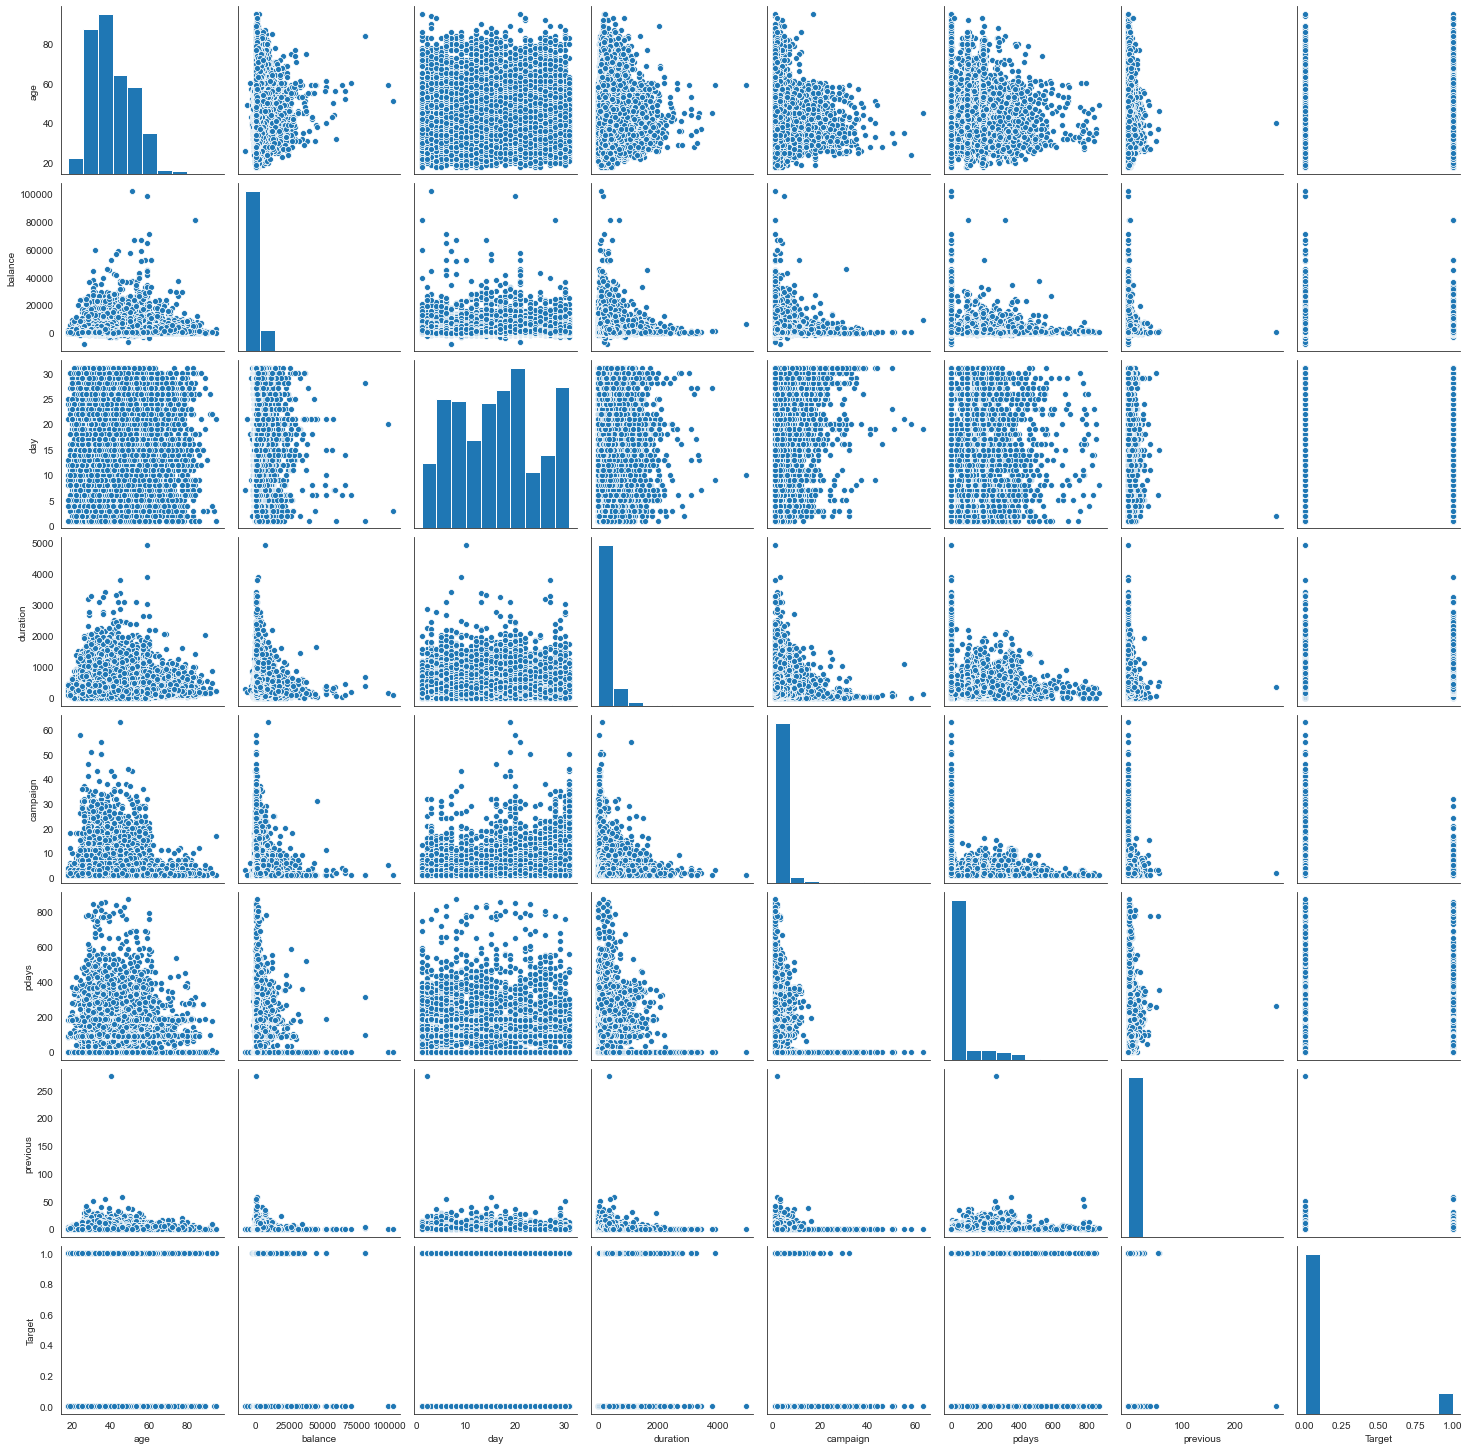

In [67]:
bankDf['Target']=bankDf['Target'].replace(['no','yes'],[0,1])
sns.pairplot(bankDf)

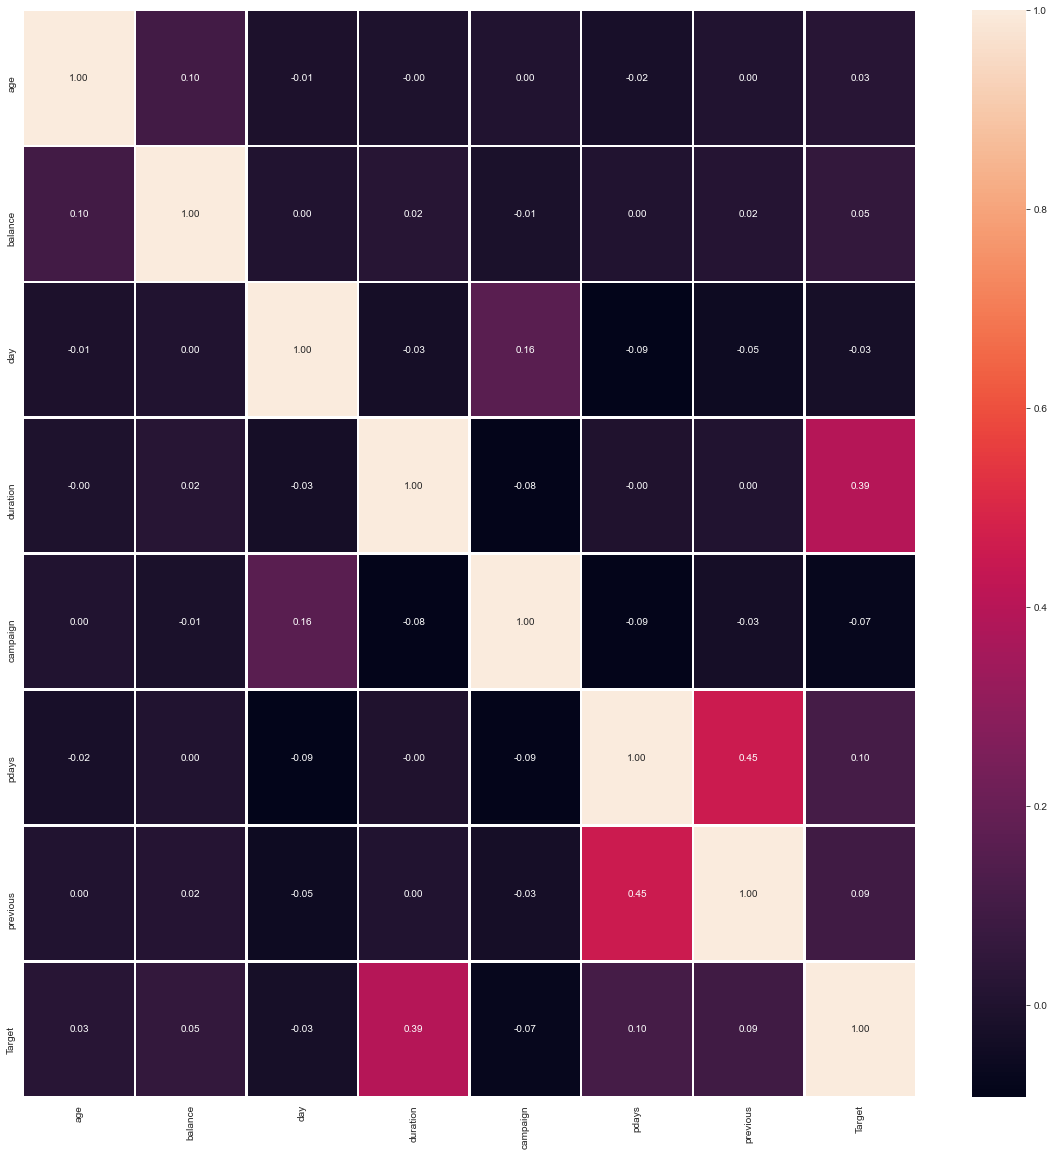

In [68]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90) 
sns.heatmap(bankDf.corr(), annot=True, linewidths=1.5, fmt= '.2f')

### Looks like pdays and previous are having a strong relationship with in the data set . We can try to remove one of them and check how our outcome will be

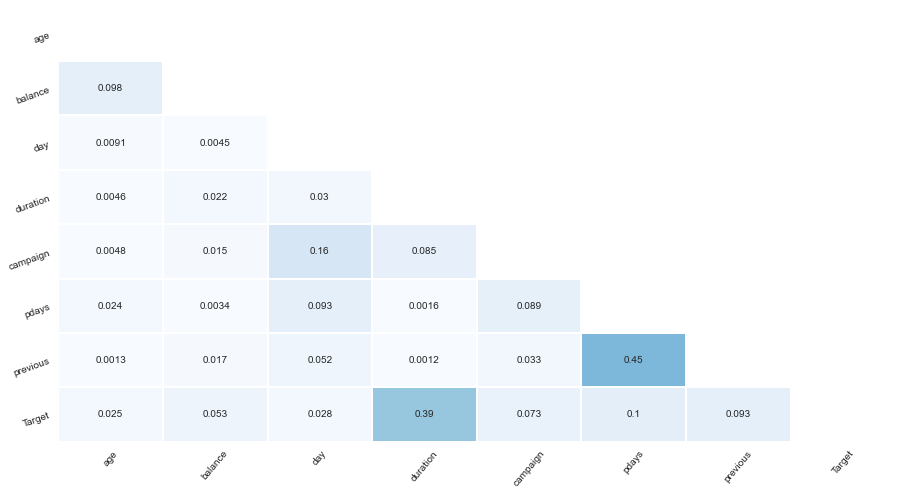

In [69]:
corr = abs(bankDf.corr())
lower_triangle = np.tril(corr, k = -1)  
mask = lower_triangle == 0 

plt.figure(figsize = (15,8)) 
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)  
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)
plt.show()

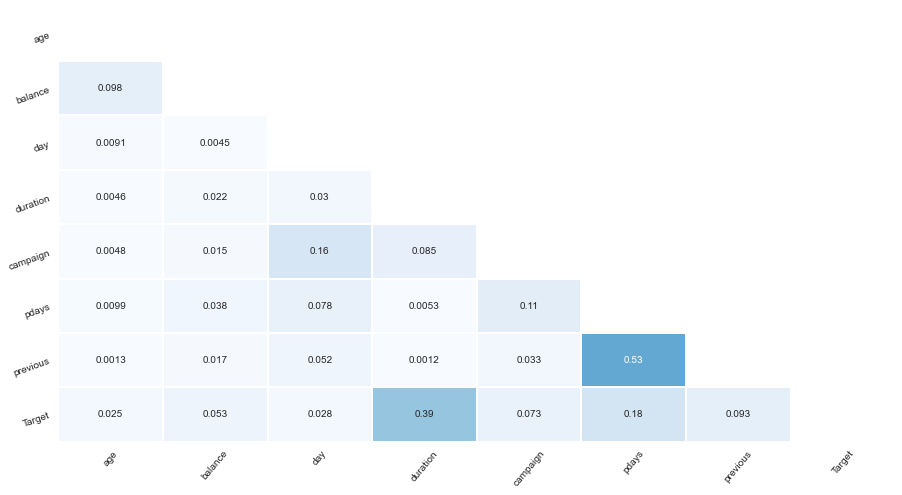

In [70]:
bankDf1=bankDf
bankDf1['pdays']=bankDf['pdays'].replace([-1],[900]) ## Replacing pdays -1 with 900 as we it is mentioned that it may not be contacted or contacted 900 days ago

corr = abs(bankDf1.corr())
lower_triangle = np.tril(corr, k = -1)  
mask = lower_triangle == 0 

plt.figure(figsize = (15,8)) 
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)  
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)
plt.show()

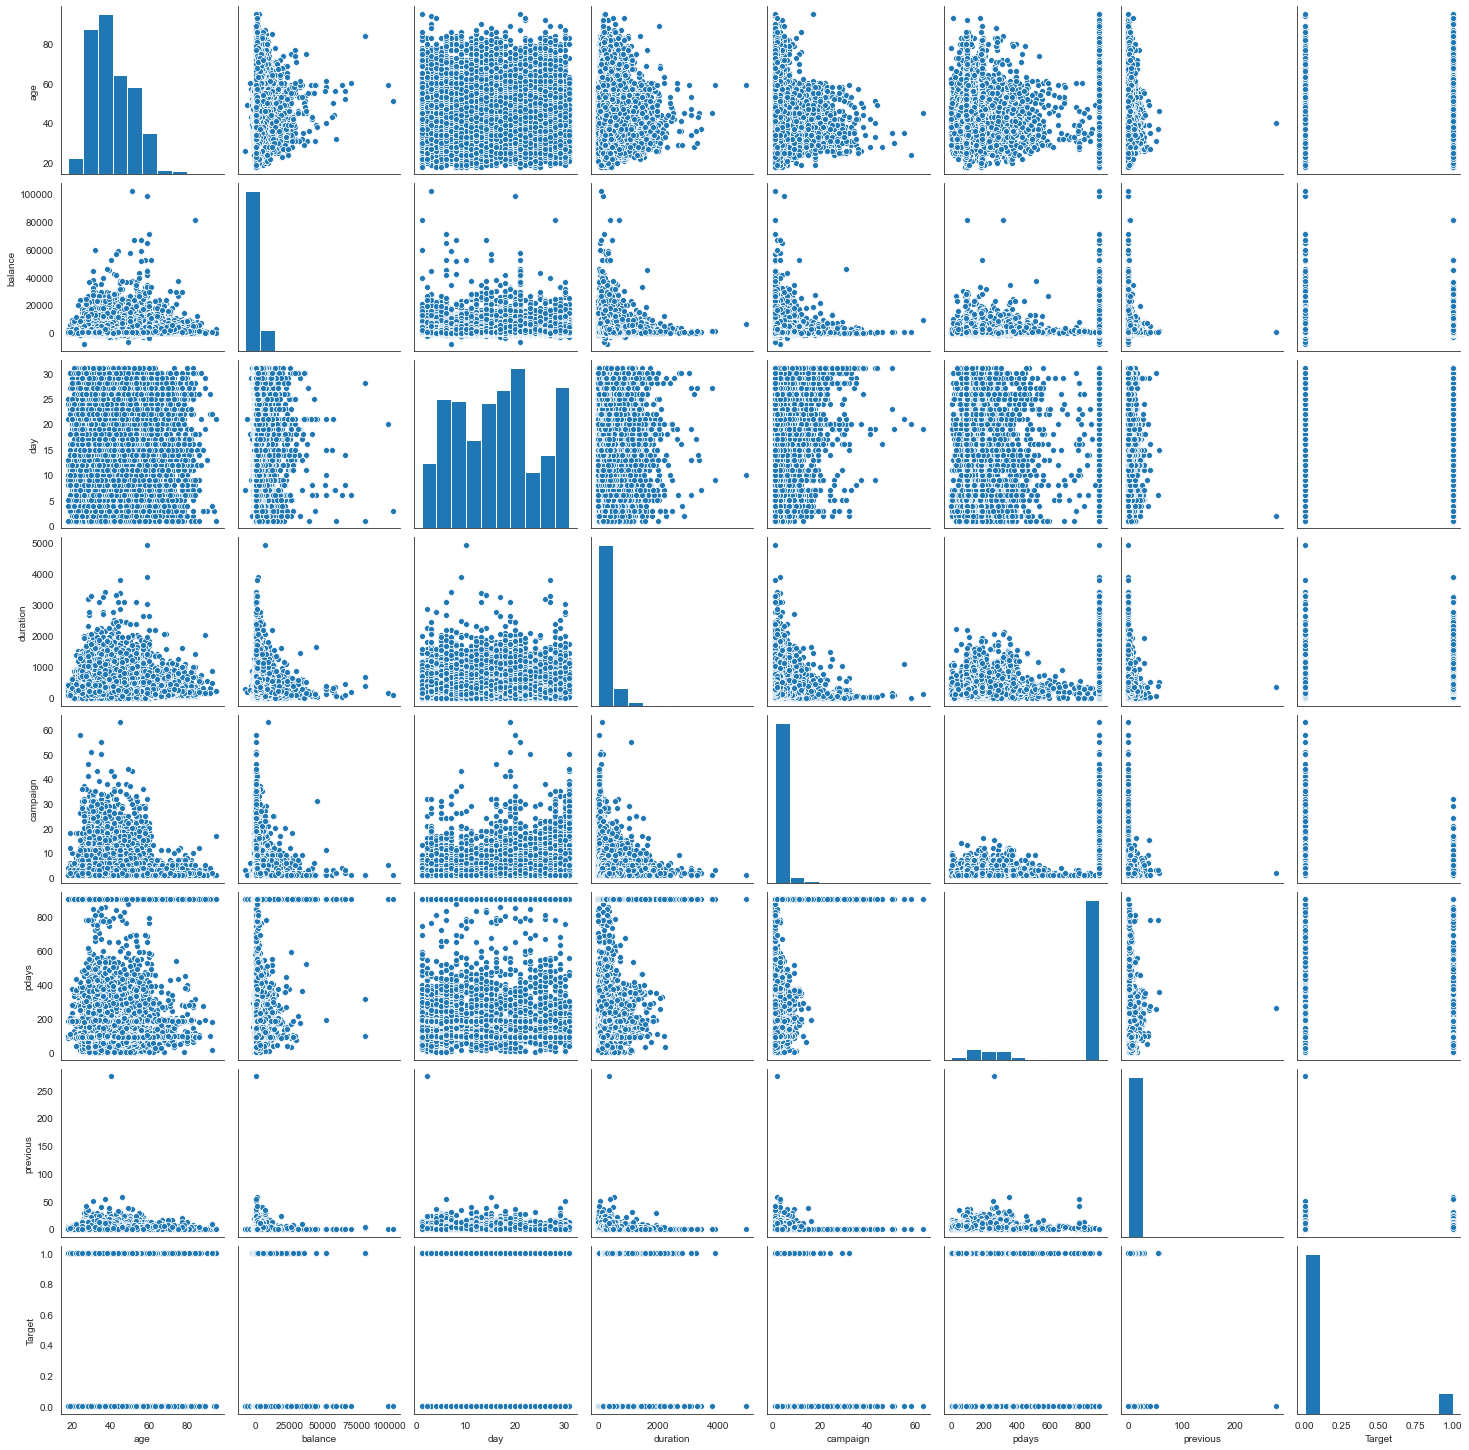

In [71]:
sns.pairplot(bankDf1)

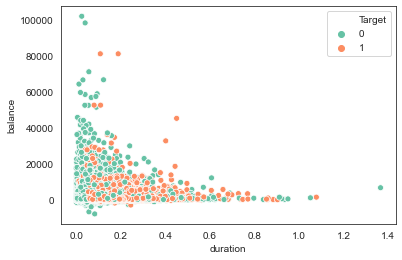

In [72]:
## From above we can drop either previous or pDate after checking initial results

sns.scatterplot(bankDf1['duration']/(3600), bankDf1['balance'],hue= bankDf1['Target'],palette='Set2') 



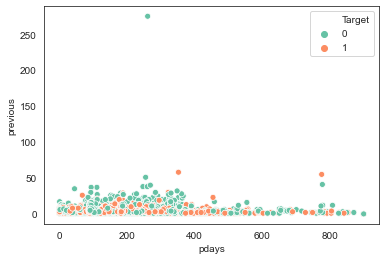

In [73]:
sns.scatterplot(bankDf1['pdays'], bankDf1['previous'],hue= bankDf1['Target'],palette='Set2') 


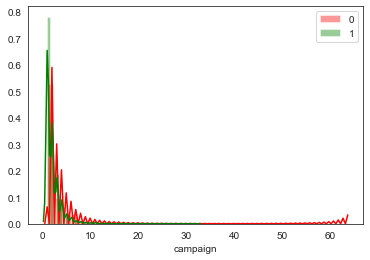

In [74]:
sns.distplot(bankDf1[bankDf1['Target']==0]['campaign'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['campaign'],color='g',label=1)
plt.legend()
plt.show()

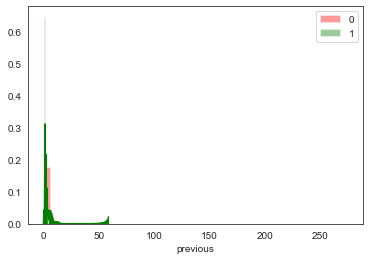

In [75]:
sns.distplot(bankDf1[bankDf1['Target']==0]['previous'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['previous'],color='g',label=1)
plt.legend()
plt.show()

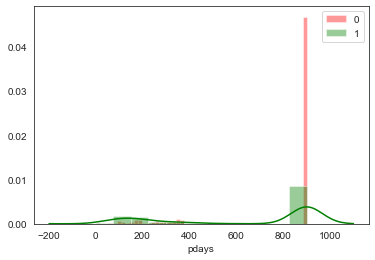

In [115]:
sns.distplot(bankDf1[bankDf1['Target']==0]['pdays'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['pdays'],color='g',label=1)
plt.legend()
plt.show()

## Based on above graphs we can see how target varible changes with different independent variables. We can see campaign has more retlation to target

### Deliverable 2 - Question 1
We already changed the objects to Categorical values and Target to 0 and 1 


### Deliverable 2 - Question 2 and 3



In [79]:
cols=['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome']
encodedBankDf=pd.get_dummies(bankDf1, columns=cols)
encodedBankDf.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,900,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Deliverable 2 - Question 4


In [80]:
encodedBankDf.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [81]:
X = encodedBankDf.drop(['day','age','duration','pdays','balance','job_unknown','marital_divorced','education_unknown','default_yes','housing_no','loan_no','contact_telephone','Target','month_sep','poutcome_unknown'],axis=1)
Y = encodedBankDf['Target'].astype('category')
## Dropping some unnecessary columns and Fetching X from other columns
## making target as Y

In [86]:
X.shape

(45211, 37)

In [87]:
Y.shape

(45211,)

In [88]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [89]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.3, random_state = 1)

In [90]:
xtrain.shape

(31647, 37)

In [91]:
xtest.shape

(13564, 37)

In [92]:
ytrain.shape

(31647,)

In [93]:
ytest.shape

(13564,)

### Deliverable 3 

In [121]:
from sklearn.linear_model import LogisticRegression   
lgtModel = LogisticRegression()  
lgtModel.fit(xtrain, ytrain)

LogisticRegression()

In [122]:
predictLGT = lgtModel.predict(xtest)    

print("Trainig score=",lgtModel.score(xtrain,ytrain),"  Testing score=",lgtModel.score(xtest, ytest))  

Trainig score= 0.891332511770468   Testing score= 0.8947213211442052


In [ ]:
## score looks good as they are close and testing score > training score

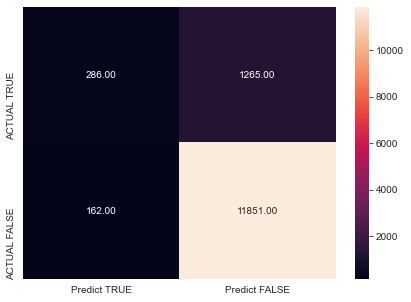

In [101]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(xtrain, ytrain)
#predict on test
ypredict = model.predict(xtest)

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

In [102]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8947950457092303
F1 score: 0.2861430715357679
F1 score: 0.8680791745041156
F1 score: [0.94321302 0.28614307]
Recall: 0.18439716312056736
Recall: 0.8947950457092303
Precision: 0.6383928571428571
Precision: 0.8732327085646199
roc_auc_score: 0.5854558861469814
roc_auc_score: 0.5854558861469814


Trainig score= 0.8965778746800644   Testing score= 0.8940578000589796


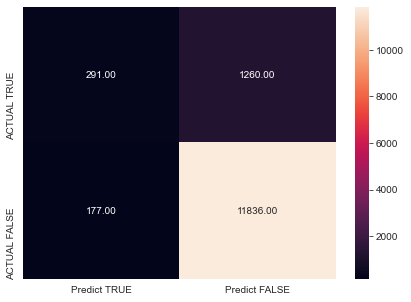

In [128]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
desTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 7)
desTree.fit(xtrain, ytrain)
ypredict = desTree.predict(xtest)
print("Trainig score=",desTree.score(xtrain,ytrain),"  Testing score=",desTree.score(xtest, ytest))  

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)



In [127]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8941315246240047
F1 score: 0.2869910625620655
F1 score: 0.8678287125381804
F1 score: [0.94282074 0.28699106]
Recall: 0.18633139909735655
Recall: 0.8941315246240047
Precision: 0.6241900647948164
Precision: 0.8717136703919495
roc_auc_score: 0.5859235452158722
roc_auc_score: 0.5859235452158722


## EL - Bagging

In [106]:
 from sklearn.tree import DecisionTreeClassifier   


In [112]:
 from sklearn.ensemble import BaggingClassifier

import sklearn.metrics as metrics

baggingCl = BaggingClassifier( DecisionTreeClassifier( max_depth=4,
                                                    random_state=0,
                                                    criterion='entropy'
                                                    ),n_estimators=50,random_state=1)

baggingCl = baggingCl.fit(xtrain, ytrain)

Trainig score= 0.8931020317881632 Testing score= 0.8956797404895311


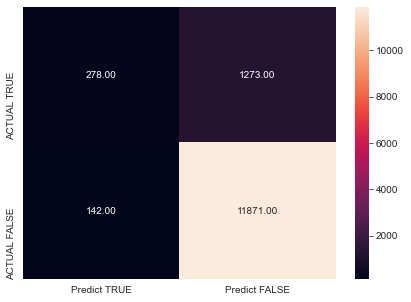

In [114]:
ypredict = baggingCl.predict(xtest)

print("Trainig score=",baggingCl.score(xtrain,ytrain), "Testing score=",baggingCl.score(xtest, ytest)) 

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)


In [116]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8956797404895311
F1 score: 0.2820903094875698
F1 score: 0.8680941918762936
F1 score: [0.94375323 0.28209031]
Recall: 0.17923920051579625
Recall: 0.8956797404895311
Precision: 0.6619047619047619
Precision: 0.8755641363523298
roc_auc_score: 0.5837093363771024
roc_auc_score: 0.5837093363771024


### EL - Boosting

In [117]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=50,random_state=1)
boost = boost.fit(xtrain, ytrain)
print("Trainig score=",boost.score(xtrain,ytrain), "Testing score=",boost.score(xtest, ytest)) 



Trainig score= 0.8913009131987234 Testing score= 0.8945001474491301


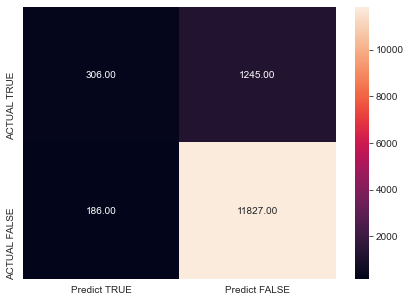

In [119]:
ypredict = boost.predict(xtest)


cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

In [120]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8945001474491301
F1 score: 0.29955947136563876
F1 score: 0.8693838558018343
F1 score: [0.94295396 0.29955947]
Recall: 0.19729206963249515
Recall: 0.8945001474491301
Precision: 0.6219512195121951
Precision: 0.8724201815154385
roc_auc_score: 0.5909044215639375
roc_auc_score: 0.5909044215639375


In [129]:
## Over all all the models looks good as training and testing accuracy is close. We can prefer bagging or Logistic regression for simplicity